### Morning Lecture

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('train.csv', index_col=0)
y = df['Survived']

ypred = [] #fill in this list of predictions with is 1s (survived) and 0s
for i, row in df.iterrows():
    if row['Sex'] == 'female': # are they men or women
        if row['Pclass'] < 3: #if it's a women, are they middle-class women?
            if row['Parch']< 4: #if it's a mioddle-class woman, do they have less than 4 children/parents?
                ypred.append(1)
            else:
                ypred.append(0)
        else:
            ypred.append(0)
    else:
        ypred.append(0)


In [2]:
print(accuracy_score(y, ypred))

0.7867564534231201


* keeping track of branches is tought!
* how do we even know what question to ask?

# Luckily, there is a DecisionTree model already in sklearn that can figure out all of this hard brain work for us!

In [3]:
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#X=[[1 for x in df['Sex'] if x=='male' else 0]]
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)

In [6]:
X=df[['Pclass','SibSp','Parch']]
y=df[['Survived']]
m.fit(X,y)
m.score(X,y)

0.7216610549943884

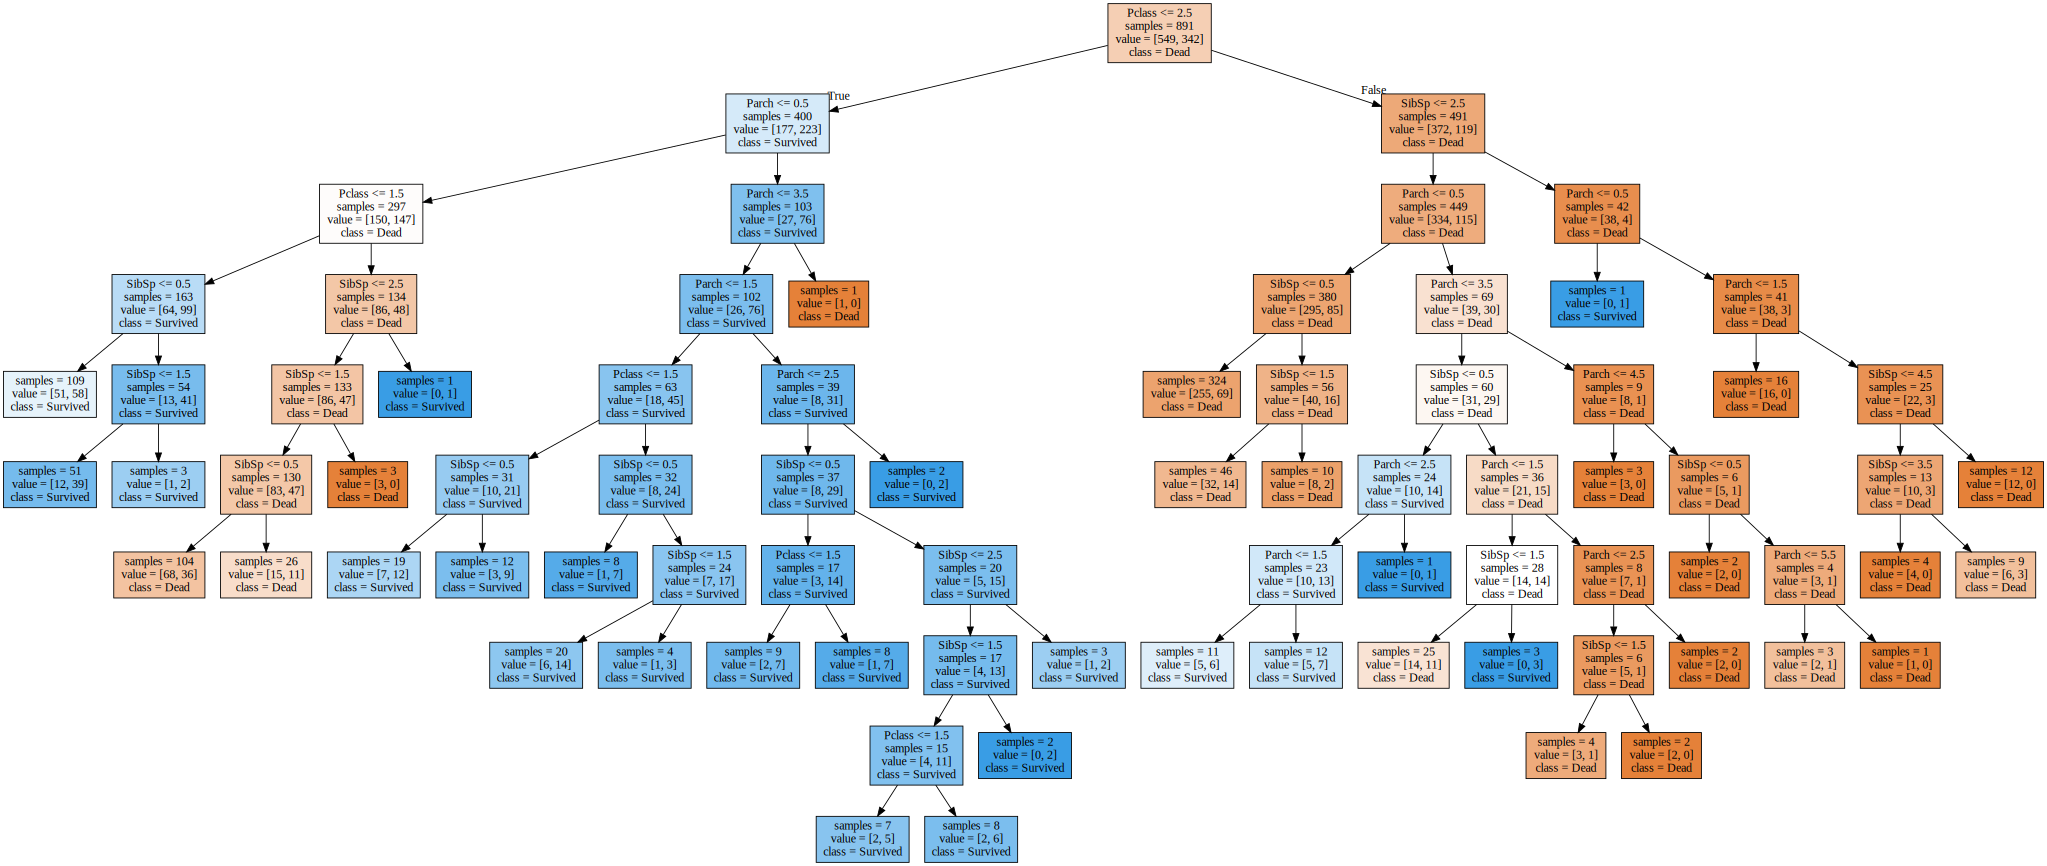

In [7]:
from sklearn.tree import export_graphviz
import graphviz
import os

tree = export_graphviz(m, out_file=None,
                class_names=["Dead", "Survived"],
                feature_names=['Pclass','SibSp','Parch'],
                impurity=False,
                filled=True)
open('titanic.dot', 'w').write(tree)

graph = graphviz.Source(tree)
graph.render('titanic')  # creates PDF
graph  # in Jupyter


### Afternoon Lecture

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
m=RandomForestClassifier()